<a href="https://colab.research.google.com/github/BenBuchanan2001/BenBuchanan2001/blob/main/Heart_Disease_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
from google.colab import files
uploaded = files.upload()

Saving heart.dat to heart (6).dat


In [32]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [33]:

import warnings
warnings.filterwarnings('ignore')

In [34]:

heart = pd.read_csv('heart.csv')

In [35]:
heart.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,2
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,1
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,2
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,1
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,1


In [38]:
heart.columns = [
  "age", "sex", "chest_pain", "rest_bp", "cholesterol",
  "fasting_bs", "rest_ecg", "max_hr", "exang", "oldpeak",
  "slope", "vessels", "thal", "target"
]

In [39]:
heart.head()

,age,sex,chest_pain,rest_bp,cholesterol,fasting_bs,rest_ecg,max_hr,exang,oldpeak,slope,vessels,thal,target
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,2
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,1
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,2
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,1
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,1


In [40]:
!pip install shap

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# For optional SHAP interpretability (advanced but useful)
import shap

# Set a style for plots
sns.set(style="whitegrid")

In [42]:
df["target"] = df["target"].map({1: 0, 2: 1})

# Quick data overview
print("Data Shape:", df.shape)
print(df.head())
print(df.info())

Data Shape: (269, 14)
    age  sex  chest_pain  rest_bp  cholesterol  fasting_bs  rest_ecg  max_hr  \
0  67.0  0.0         3.0    115.0        564.0         0.0       2.0   160.0   
1  57.0  1.0         2.0    124.0        261.0         0.0       0.0   141.0   
2  64.0  1.0         4.0    128.0        263.0         0.0       0.0   105.0   
3  74.0  0.0         2.0    120.0        269.0         0.0       2.0   121.0   
4  65.0  1.0         4.0    120.0        177.0         0.0       0.0   140.0   

   exang  oldpeak  slope  vessels  thal  target  
0    0.0      1.6    2.0      0.0   7.0       0  
1    0.0      0.3    1.0      0.0   7.0       1  
2    1.0      0.2    2.0      1.0   7.0       0  
3    1.0      0.2    1.0      1.0   3.0       0  
4    0.0      0.4    1.0      0.0   7.0       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age

              age         sex  chest_pain     rest_bp  cholesterol  \
count  269.000000  269.000000  269.000000  269.000000   269.000000   
mean    54.375465    0.676580    3.171004  131.349442   249.390335   
std      9.076186    0.468653    0.950518   17.894712    51.592983   
min     29.000000    0.000000    1.000000   94.000000   126.000000   
25%     48.000000    0.000000    3.000000  120.000000   213.000000   
50%     55.000000    1.000000    3.000000  130.000000   245.000000   
75%     61.000000    1.000000    4.000000  140.000000   277.000000   
max     77.000000    1.000000    4.000000  200.000000   564.000000   

       fasting_bs    rest_ecg      max_hr       exang     oldpeak       slope  \
count  269.000000  269.000000  269.000000  269.000000  269.000000  269.000000   
mean     0.148699    1.018587  149.828996    0.330855    1.044981    1.583643   
std      0.356455    0.997959   23.075002    0.471398    1.144366    0.615011   
min      0.000000    0.000000   71.000000    

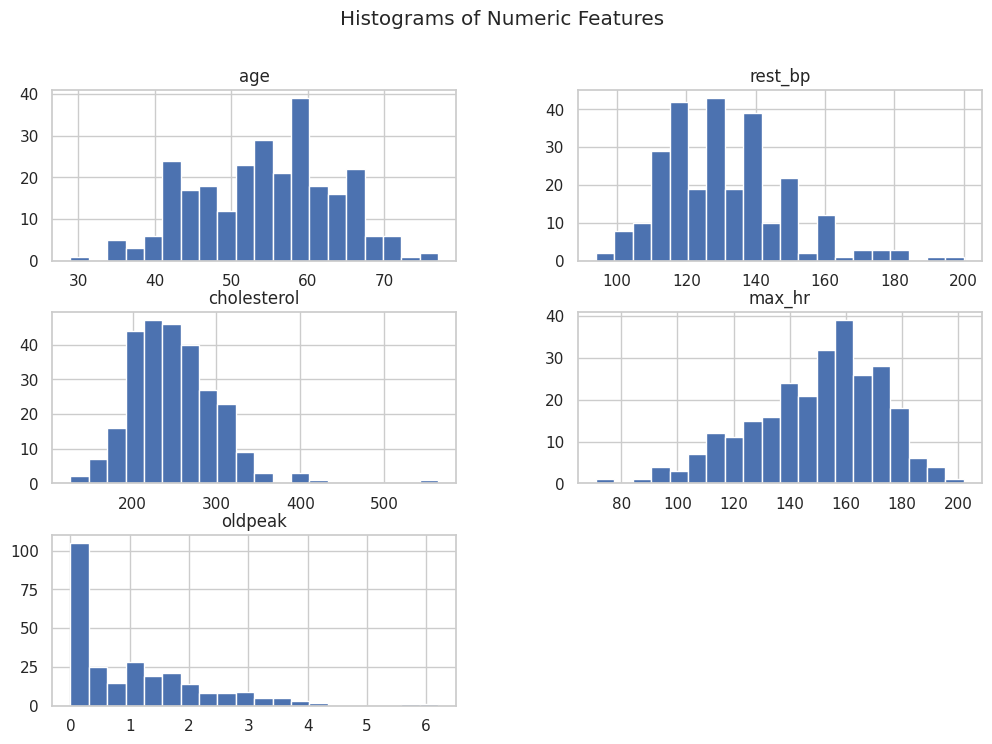

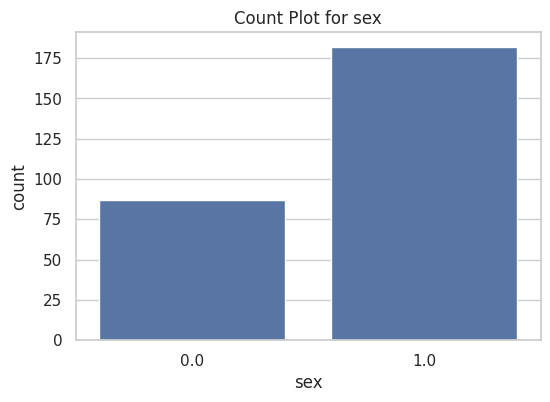

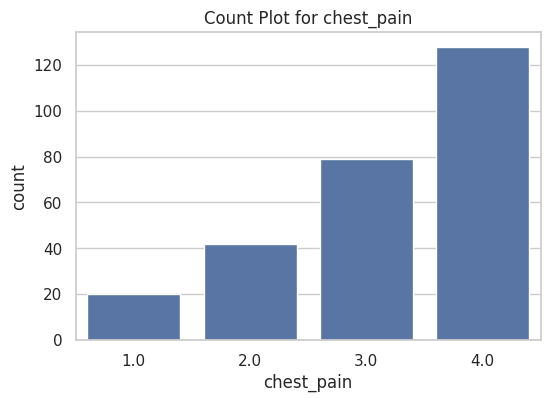

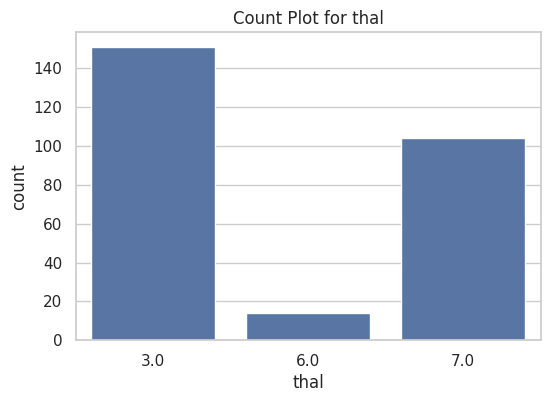

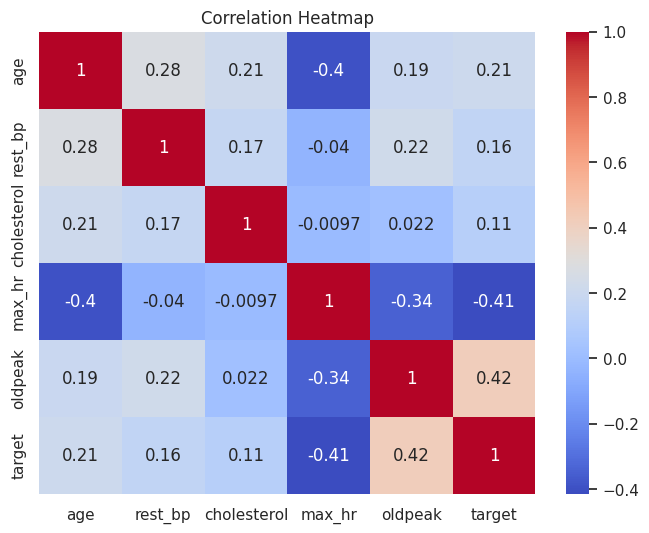

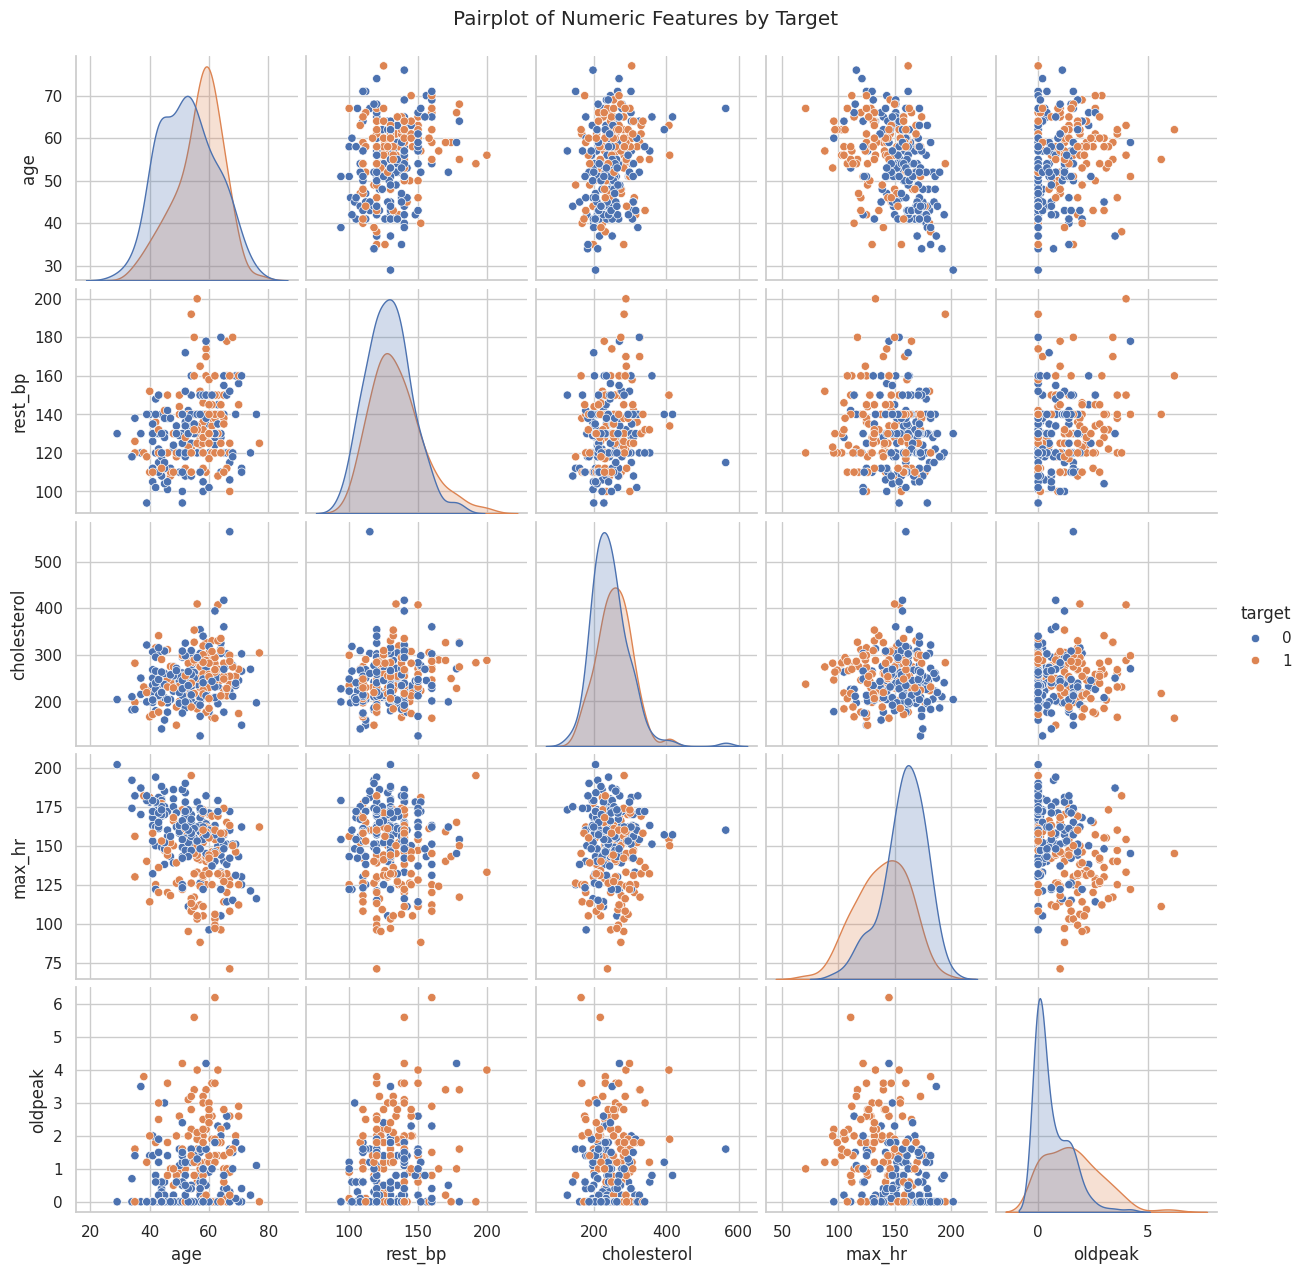

In [43]:
# %% [code]
# Exploratory Data Analysis (EDA)
# 1. Summary statistics and info
print(df.describe())

# 2. Histograms for numerical features
numeric_features = ["age", "rest_bp", "cholesterol", "max_hr", "oldpeak"]
df[numeric_features].hist(bins=20, figsize=(12,8))
plt.suptitle("Histograms of Numeric Features")
plt.show()

# 3. Count plots for key categorical features
categorical_features = ["sex", "chest_pain", "fasting_bs", "rest_ecg", "exang", "slope", "vessels", "thal"]
for col in ["sex", "chest_pain", "thal"]:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df)
    plt.title(f"Count Plot for {col}")
    plt.show()

# 4. Correlation heatmap for numeric features
plt.figure(figsize=(8,6))
sns.heatmap(df[numeric_features + ["target"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# 5. Pairplot colored by target to inspect relationships
sns.pairplot(df, vars=numeric_features, hue="target", diag_kind="kde")
plt.suptitle("Pairplot of Numeric Features by Target", y=1.02)
plt.show()

In [44]:
# %% [code]
# Data Preprocessing and Train/Test Split

# Define which features are numeric and which are categorical (using same definitions as above)
categorical_features = ["sex", "chest_pain", "fasting_bs", "rest_ecg", "exang", "slope", "vessels", "thal"]

# Separate features and target
X = df.drop("target", axis=1)
y = df["target"]

# Create transformers for numeric and categorical data
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# Combine transformations into a ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ("num", numeric_transformer, numeric_features),
    ("cat", categorical_transformer, categorical_features)
])

# Split the data (80% train, 20% test) with stratification on the target for balance
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (215, 13)
Test set shape: (54, 13)


In [45]:
# %% [code]
# Model Building and Hyperparameter Tuning using a Pipeline and GridSearchCV
# We will use a RandomForestClassifier as an example.

# Create a pipeline that combines preprocessing and the classifier
rf_pipeline = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("classifier", RandomForestClassifier(random_state=42))
])

# Define a parameter grid for hyperparameter tuning
param_grid_rf = {
    "classifier__n_estimators": [50, 100, 150],
    "classifier__max_depth": [None, 5, 10],
    "classifier__min_samples_split": [2, 5]
}

# Set up GridSearchCV with 5-fold cross-validation
grid_search_rf = GridSearchCV(rf_pipeline, param_grid=param_grid_rf,
                              cv=5, scoring="accuracy", n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

print("Best parameters found:", grid_search_rf.best_params_)
print("Best cross-validation accuracy: {:.2f}%".format(grid_search_rf.best_score_ * 100))

Best parameters found: {'classifier__max_depth': None, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}
Best cross-validation accuracy: 83.26%


Test set accuracy: 83.33%
Confusion Matrix:
 [[25  5]
 [ 4 20]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.83      0.85        30
           1       0.80      0.83      0.82        24

    accuracy                           0.83        54
   macro avg       0.83      0.83      0.83        54
weighted avg       0.83      0.83      0.83        54



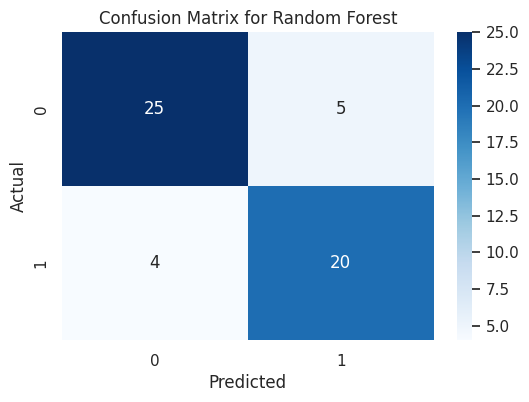

In [46]:
# %% [code]
# Evaluate the best model on the test set
test_accuracy = grid_search_rf.score(X_test, y_test)
print("Test set accuracy: {:.2f}%".format(test_accuracy * 100))

# Get predictions on the test set
y_pred = grid_search_rf.predict(X_test)

# Print confusion matrix and classification report
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Visualize the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix for Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Top 10 Important Features:
            Feature  Importance
27        thal_7.0    0.103655
10  chest_pain_4.0    0.086284
3           max_hr    0.085051
25        thal_3.0    0.080006
21     vessels_0.0    0.077942
4          oldpeak    0.074963
2      cholesterol    0.074911
0              age    0.066741
1          rest_bp    0.058523
17       exang_1.0    0.041606


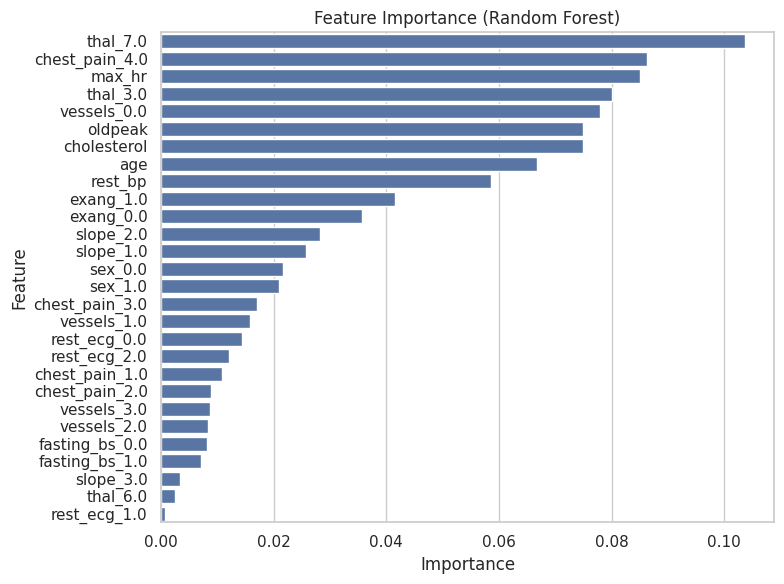

In [47]:
# %% [code]
# Feature Importance for the Random Forest model
# Retrieve the best estimator from the grid search
best_rf = grid_search_rf.best_estimator_.named_steps["classifier"]

# To get the feature names after one-hot encoding, extract them from the ColumnTransformer:
encoded_cat = grid_search_rf.best_estimator_.named_steps["preprocessing"]\
                 .transformers_[1][1].named_steps["onehot"].get_feature_names_out(categorical_features)
all_feature_names = numeric_features + list(encoded_cat)

# Get feature importances and create a DataFrame for visualization
importances = best_rf.feature_importances_
feat_imp_df = pd.DataFrame({"Feature": all_feature_names, "Importance": importances}).sort_values("Importance", ascending=False)

print("Top 10 Important Features:\n", feat_imp_df.head(10))

plt.figure(figsize=(8,6))
sns.barplot(x="Importance", y="Feature", data=feat_imp_df)
plt.title("Feature Importance (Random Forest)")
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

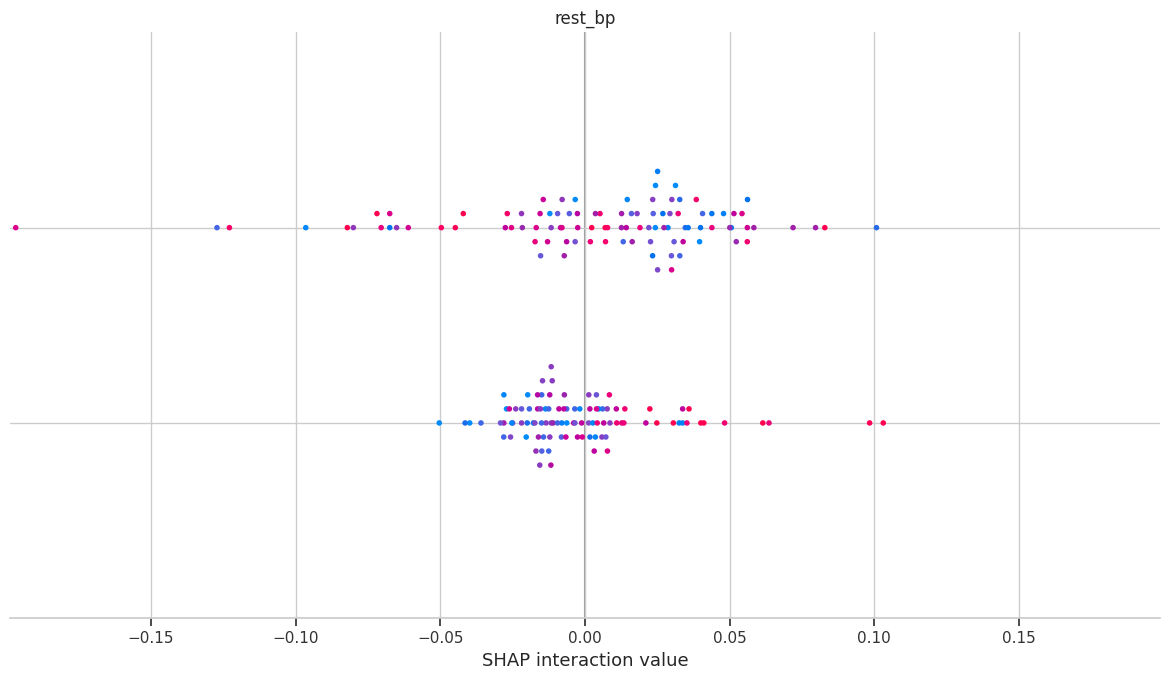

In [48]:
# %% [code]
# Optional: Advanced Model Interpretability with SHAP
# Uncomment the following code if you wish to perform SHAP analysis

# Note: This may take a bit of time depending on your sample size.
try:
    # Use a subset of the training data for SHAP to speed up calculations
    X_sample = grid_search_rf.best_estimator_.named_steps["preprocessing"].transform(X_train.iloc[:100])
    explainer = shap.TreeExplainer(best_rf)
    shap_values = explainer.shap_values(X_sample)

    # Create a SHAP summary plot
    shap.summary_plot(shap_values, X_sample, feature_names=all_feature_names)
except Exception as e:
    print("SHAP analysis could not be completed:", e)

In [50]:
# %% [code]
# Data Preprocessing and Train/Test Split

# Separate features and target
X = df.drop("target", axis=1)
y = df["target"]

# Create pipelines for numeric and categorical features
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# Combine into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

# Split the data (80% training, 20% test), stratified by target for balance
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (215, 13)
Test set shape: (54, 13)


In [51]:
# %% [code]
# Model Pipeline: Random Forest with GridSearchCV
rf_pipeline = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("classifier", RandomForestClassifier(random_state=42))
])

param_grid_rf = {
    "classifier__n_estimators": [50, 100, 150],
    "classifier__max_depth": [None, 5, 10],
    "classifier__min_samples_split": [2, 5]
}

grid_search_rf = GridSearchCV(rf_pipeline, param_grid=param_grid_rf,
                              cv=5, scoring="accuracy", n_jobs=-1)
grid_search_rf.fit(X_train, y_train)
print("Best parameters:", grid_search_rf.best_params_)
print("Best CV Accuracy: {:.2f}%".format(grid_search_rf.best_score_ * 100))

Best parameters: {'classifier__max_depth': None, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}
Best CV Accuracy: 83.26%


Test set accuracy: 83.33%
Confusion Matrix:
 [[25  5]
 [ 4 20]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.83      0.85        30
           1       0.80      0.83      0.82        24

    accuracy                           0.83        54
   macro avg       0.83      0.83      0.83        54
weighted avg       0.83      0.83      0.83        54



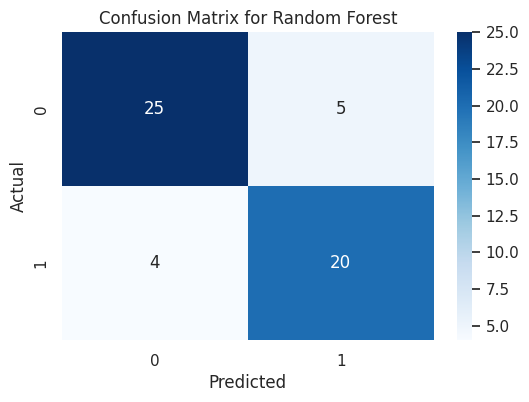

In [52]:
# %% [code]
# Evaluate the best model on the test set
test_accuracy = grid_search_rf.score(X_test, y_test)
print("Test set accuracy: {:.2f}%".format(test_accuracy * 100))

y_pred = grid_search_rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Visualize the Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix for Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

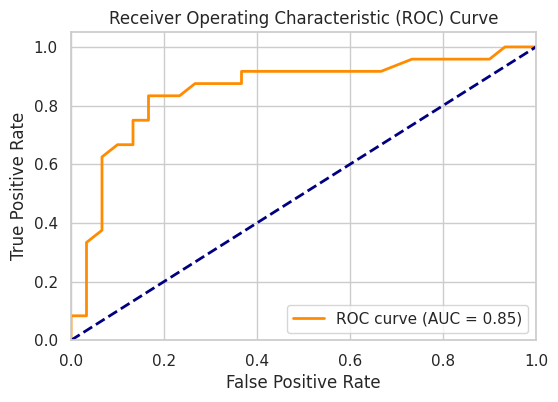

In [53]:
# %% [code]
# Plot ROC Curve and calculate AUC for the best Random Forest model
from sklearn.metrics import roc_curve, auc

# Predict probabilities
y_probs = grid_search_rf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color="darkorange", lw=2, label="ROC curve (AUC = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

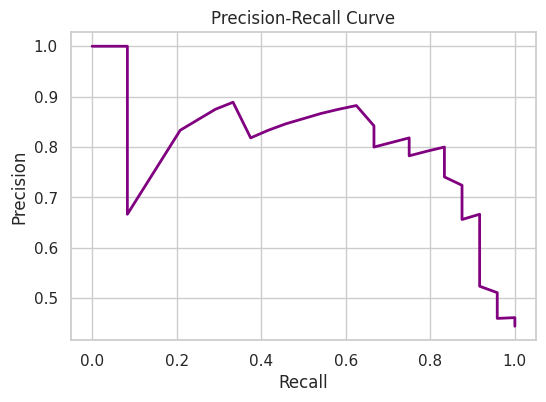

In [54]:
# %% [code]
# Plot Precision-Recall Curve
from sklearn.metrics import precision_recall_curve

precision, recall, pr_thresholds = precision_recall_curve(y_test, y_probs)
plt.figure(figsize=(6,4))
plt.plot(recall, precision, color="purple", lw=2)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()

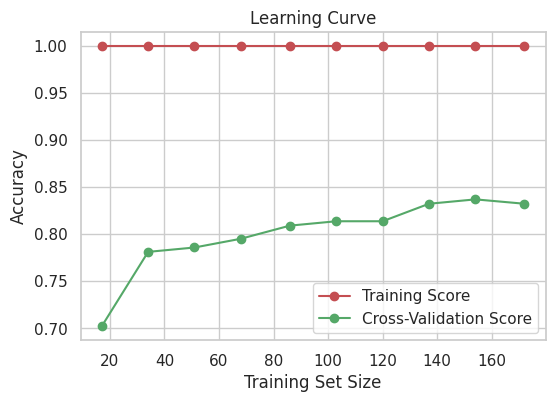

In [55]:
# %% [code]
# Plot a Learning Curve to show model performance vs. training size
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    grid_search_rf.best_estimator_, X_train, y_train, cv=5,
    scoring="accuracy", n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(6,4))
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-Validation Score")
plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.show()

In [57]:
# %% [code]
# (Optional) Advanced interpretability using SHAP
try:
    # Use a small subset to speed up SHAP computation
    X_sample = grid_search_rf.best_estimator_.named_steps["preprocessing"].transform(X_train.iloc[:100])
    explainer = shap.TreeExplainer(best_rf)
    shap_values = explainer.shap_values(X_sample)

    # Summary plot of SHAP values
    shap.summary_plot(shap_values, X_sample, feature_names=all_features)
except Exception as e:
    print("SHAP analysis encountered an error:", e)

SHAP analysis encountered an error: name 'all_features' is not defined


In [58]:
param_grid_rf = {
    "classifier__n_estimators": [50, 100, 150, 200],
    "classifier__max_depth": [None, 5, 10, 15],
    "classifier__min_samples_split": [2, 5, 10],
    "classifier__min_samples_leaf": [1, 2, 4]
}

In [59]:
from sklearn.model_selection import RandomizedSearchCV

random_search_rf = RandomizedSearchCV(rf_pipeline, param_distributions=param_grid_rf,
                                      n_iter=20, cv=5, scoring="accuracy", n_jobs=-1, random_state=42)
random_search_rf.fit(X_train, y_train)
print("Best parameters (random search):", random_search_rf.best_params_)
print("Best CV Accuracy (random search): {:.2f}%".format(random_search_rf.best_score_ * 100))

Best parameters (random search): {'classifier__n_estimators': 150, 'classifier__min_samples_split': 5, 'classifier__min_samples_leaf': 2, 'classifier__max_depth': None}
Best CV Accuracy (random search): 83.72%


In [60]:
from sklearn.model_selection import RandomizedSearchCV

random_search_rf = RandomizedSearchCV(rf_pipeline, param_distributions=param_grid_rf,
                                      n_iter=20, cv=5, scoring="accuracy", n_jobs=-1, random_state=42)
random_search_rf.fit(X_train, y_train)
print("Best parameters (random search):", random_search_rf.best_params_)
print("Best CV Accuracy (random search): {:.2f}%".format(random_search_rf.best_score_ * 100))

Best parameters (random search): {'classifier__n_estimators': 150, 'classifier__min_samples_split': 5, 'classifier__min_samples_leaf': 2, 'classifier__max_depth': None}
Best CV Accuracy (random search): 83.72%


In [61]:
# Create a new feature 'heart_rate_reserve'
df['heart_rate_reserve'] = df['max_hr'] - df['rest_bp'] * 0.1  # Example transformation

# Update numeric features list
numeric_features = ["age", "rest_bp", "cholesterol", "max_hr", "oldpeak", "heart_rate_reserve"]

In [62]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

selector = RFE(RandomForestClassifier(random_state=42), n_features_to_select=8)
selector = selector.fit(X_train, y_train)
selected_features = X_train.columns[selector.support_]
print("Selected Features:", selected_features)

Selected Features: Index(['age', 'chest_pain', 'rest_bp', 'cholesterol', 'max_hr', 'oldpeak',
       'vessels', 'thal'],
      dtype='object')


In [63]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Define individual models
rf_model = grid_search_rf.best_estimator_.named_steps["classifier"]
log_model = LogisticRegression(max_iter=1000, random_state=42)
knn_model = KNeighborsClassifier(n_neighbors=5)

# Create pipelines for each if needed (or use the preprocessed X_train directly)
# Here, we'll assume the same preprocessor is used for all.
voting_clf = VotingClassifier(estimators=[
    ('rf', grid_search_rf.best_estimator_),
    ('log', Pipeline(steps=[("preprocessing", preprocessor), ("classifier", log_model)])),
    ('knn', Pipeline(steps=[("preprocessing", preprocessor), ("classifier", knn_model)]))
], voting='hard', n_jobs=-1)

voting_clf.fit(X_train, y_train)
print("Voting Classifier Test Accuracy:", voting_clf.score(X_test, y_test))

Voting Classifier Test Accuracy: 0.8888888888888888


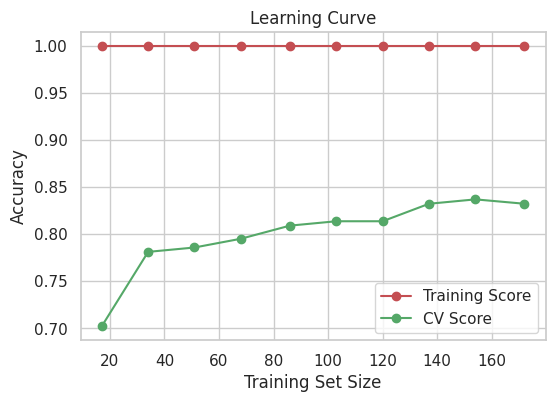

In [64]:
train_sizes, train_scores, test_scores = learning_curve(
    grid_search_rf.best_estimator_, X_train, y_train, cv=5,
    scoring="accuracy", n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)
plt.figure(figsize=(6,4))
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color="r", label="Training Score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', color="g", label="CV Score")
plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.show()

In [66]:
from sklearn.model_selection import RandomizedSearchCV

random_search_rf = RandomizedSearchCV(rf_pipeline, param_distributions=param_grid_rf,
                                      n_iter=20, cv=5, scoring="accuracy", n_jobs=-1, random_state=42)
random_search_rf.fit(X_train, y_train)
print("Best parameters (random search):", random_search_rf.best_params_)
print("Best CV Accuracy (random search): {:.2f}%".format(random_search_rf.best_score_ * 100))

Best parameters (random search): {'classifier__n_estimators': 150, 'classifier__min_samples_split': 5, 'classifier__min_samples_leaf': 2, 'classifier__max_depth': None}
Best CV Accuracy (random search): 83.72%


In [68]:
param_grid_rf = {
    "classifier__n_estimators": [50, 100, 150, 200],
    "classifier__max_depth": [None, 5, 10, 15],
    "classifier__min_samples_split": [2, 5, 10],
    "classifier__min_samples_leaf": [1, 2, 4]
}

grid_search_rf = GridSearchCV(rf_pipeline, param_grid=param_grid_rf,
                              cv=5, scoring="accuracy", n_jobs=-1)
grid_search_rf.fit(X_train, y_train)
print("Best parameters:", grid_search_rf.best_params_)
print("Best CV Accuracy: {:.2f}%".format(grid_search_rf.best_score_ * 100))

Best parameters: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 50}
Best CV Accuracy: 84.65%


In [69]:
from sklearn.ensemble import ExtraTreesClassifier

et_pipeline = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("classifier", ExtraTreesClassifier(random_state=42))
])

param_grid_et = {
    "classifier__n_estimators": [50, 100, 150],
    "classifier__max_depth": [None, 5, 10],
    "classifier__min_samples_split": [2, 5],
    "classifier__min_samples_leaf": [1, 2]
}

grid_search_et = GridSearchCV(et_pipeline, param_grid=param_grid_et,
                              cv=5, scoring="accuracy", n_jobs=-1)
grid_search_et.fit(X_train, y_train)
print("Best parameters (ExtraTrees):", grid_search_et.best_params_)
print("Best CV Accuracy (ExtraTrees): {:.2f}%".format(grid_search_et.best_score_ * 100))

Best parameters (ExtraTrees): {'classifier__max_depth': 5, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 50}
Best CV Accuracy (ExtraTrees): 85.12%


In [70]:
test_accuracy_rf = grid_search_rf.score(X_test, y_test)
test_accuracy_et = grid_search_et.score(X_test, y_test)
print("Test Accuracy - Random Forest: {:.2f}%".format(test_accuracy_rf * 100))
print("Test Accuracy - Extra Trees: {:.2f}%".format(test_accuracy_et * 100))

Test Accuracy - Random Forest: 85.19%
Test Accuracy - Extra Trees: 81.48%


In [72]:
from sklearn.metrics import f1_score

# Suppose you've already trained a model using GridSearchCV, for example:
#   grid_search_rf.fit(X_train, y_train)
# and your test features/labels are X_test, y_test.

# 1. Predict on the test set
y_pred = grid_search_rf.predict(X_test)

# 2. Calculate the F1-score
f1 = f1_score(y_test, y_pred)  # default is 'binary' for binary classification

print("F1-score:", f1)

F1-score: 0.84


In [75]:
test_accuracy = grid_search_rf.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.8518518518518519


In [78]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86        30
           1       0.81      0.88      0.84        24

    accuracy                           0.85        54
   macro avg       0.85      0.85      0.85        54
weighted avg       0.86      0.85      0.85        54

